In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
#import plotly.figure_factory as ff
#import plotly.express as px

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import ElasticNet, LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
import pickle

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/file/d/18Fb1WJrWoq0GlRhVyh9GH8NQ8GWd5gQm/view?usp=sharing' -O "Feature.zip"
!unzip "Feature.zip"

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading The Data

In [ ]:
soundFeature = pd.read_csv("Feature.csv")

In [ ]:
print(soundFeature .shape)

(540, 43)


# Split a Dataset 

In [ ]:
train, test = train_test_split(soundFeature,test_size=0.4, random_state=42)

In [ ]:
train.shape

(324, 43)

In [ ]:
test.shape

(216, 43)

In [ ]:
Y = 'category'
X = soundFeature.loc[:, soundFeature.columns != Y].columns

In [ ]:
X.shape

(42,)

In [ ]:
x= soundFeature[X]

In [ ]:
x.shape

(540, 42)

In [ ]:
y= soundFeature[Y]

In [ ]:
y.shape

(540,)

In [ ]:
type(soundFeature)

pandas.core.frame.DataFrame

In [ ]:
soundFeature.columns

Index(['MFCCs1-deviation', 'MFCCs1-median', 'MFCCs10-deviation',
       'MFCCs10-median', 'MFCCs11-deviation', 'MFCCs11-median',
       'MFCCs12-deviation', 'MFCCs12-median', 'MFCCs13-deviation',
       'MFCCs13-median', 'MFCCs2-deviation', 'MFCCs2-median',
       'MFCCs3-deviation', 'MFCCs3-median', 'MFCCs4-deviation',
       'MFCCs4-median', 'MFCCs5-deviation', 'MFCCs5-median',
       'MFCCs6-deviation', 'MFCCs6-median', 'MFCCs7-deviation',
       'MFCCs7-median', 'MFCCs8-deviation', 'MFCCs8-median',
       'MFCCs9-deviation', 'MFCCs9-median', 'category',
       'short-term-energy-deviation', 'short-term-energy-median',
       'short-term-entropy-deviation', 'short-term-entropy-median',
       'spectral-centroid1-deviation', 'spectral-centroid1-median',
       'spectral-centroid2-deviation', 'spectral-centroid2-median',
       'spectral-entropy-deviation', 'spectral-entropy-median',
       'spectral-flux-deviation', 'spectral-flux-median',
       'spectral-rolloff-deviation', 'spectr

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(soundFeature[X], soundFeature[Y],test_size=0.4, random_state=42)

In [ ]:
X_train.shape

(324, 42)

In [ ]:
X_test.shape

(216, 42)

In [ ]:
y_train.shape

(324,)

In [ ]:
y_test.shape

(216,)

# Data preparation

In [ ]:
#get the info in datafram
soundFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MFCCs1-deviation              540 non-null    float64
 1   MFCCs1-median                 540 non-null    float64
 2   MFCCs10-deviation             540 non-null    float64
 3   MFCCs10-median                540 non-null    float64
 4   MFCCs11-deviation             540 non-null    float64
 5   MFCCs11-median                540 non-null    float64
 6   MFCCs12-deviation             540 non-null    float64
 7   MFCCs12-median                540 non-null    float64
 8   MFCCs13-deviation             540 non-null    float64
 9   MFCCs13-median                540 non-null    float64
 10  MFCCs2-deviation              540 non-null    float64
 11  MFCCs2-median                 540 non-null    float64
 12  MFCCs3-deviation              540 non-null    float64
 13  MFCCs

In [ ]:
soundFeature.head()

,MFCCs1-deviation,MFCCs1-median,MFCCs10-deviation,MFCCs10-median,MFCCs11-deviation,MFCCs11-median,MFCCs12-deviation,MFCCs12-median,MFCCs13-deviation,MFCCs13-median,...,spectral-centroid2-deviation,spectral-centroid2-median,spectral-entropy-deviation,spectral-entropy-median,spectral-flux-deviation,spectral-flux-median,spectral-rolloff-deviation,spectral-rolloff-median,zero-crossing-deviation,zero-crossing-median
0,0.077713,0.271746,3.324902e-02,0.155706,0.059562,2.432404e+00,3.225215e-02,0.104898,0.049655,5.717350e-01,...,0.069458,3.204824,2.001250e-01,5.971329e-02,0.061400,0.247299,1.190573e-01,0.005956,0.078707,0.068306
1,0.065226,0.194548,8.395482e-03,0.170885,0.032308,1.144038e+00,-8.303745e-02,0.035652,0.037379,-6.303222e-01,...,0.041040,2.561634,-5.215499e-03,8.073704e-02,0.039170,0.224415,3.080449e-02,0.007614,0.088092,0.122505
2,0.089770,0.269012,-1.105905e-01,1.057548,0.062033,-3.138759e-01,1.396222e-01,0.192089,0.065782,-2.340937e-01,...,0.124805,3.158970,4.246102e-01,3.772999e-02,0.091861,0.469203,2.001835e-01,0.004780,0.091969,0.434664
3,0.003935,0.086331,1.460000e-15,0.556781,0.005801,9.370000e-15,2.190000e-15,0.031285,0.000039,3.890000e-15,...,0.008972,3.321059,4.320000e-15,6.100000e-07,0.007181,0.029884,3.240000e-15,0.029702,0.004556,0.000000
4,0.057182,0.185445,-1.750000e-14,4.785027,0.035301,7.230000e-14,-3.700000e-14,0.189126,0.090568,2.940000e-14,...,0.097428,3.256161,6.420000e-15,6.491400e-02,0.075083,0.265454,-2.460000e-15,0.051570,0.137844,0.163235


In [ ]:
#if I have duplicate or not
dups = soundFeature .duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(soundFeature .shape)

Number of duplicate rows = 2
(540, 43)


In [ ]:
print('Before',soundFeature.shape)
soundFeature.drop_duplicates(inplace=True) 
print('After',soundFeature.shape)

Before (540, 43)
After (538, 43)


In [ ]:
soundFeature.isna().sum().sum()

0

In [ ]:
def outliers(df_data,var):
    a = []
    q1 =  df_data[var].quantile(.25)
    q2 =  df_data[var].quantile(.5)
    q3 =  df_data[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in  df_data[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

In [ ]:
for col in  soundFeature.select_dtypes(exclude='int64').columns:
     soundFeature[col] = outliers(soundFeature,col)

In [ ]:
soundFeature.isna().sum().sum()

1351

In [ ]:
soundFeature.head(-10)

,MFCCs1-deviation,MFCCs1-median,MFCCs10-deviation,MFCCs10-median,MFCCs11-deviation,MFCCs11-median,MFCCs12-deviation,MFCCs12-median,MFCCs13-deviation,MFCCs13-median,...,spectral-centroid2-deviation,spectral-centroid2-median,spectral-entropy-deviation,spectral-entropy-median,spectral-flux-deviation,spectral-flux-median,spectral-rolloff-deviation,spectral-rolloff-median,zero-crossing-deviation,zero-crossing-median
0,0.077713,0.271746,3.324902e-02,0.155706,0.059562,2.432404e+00,3.225215e-02,0.104898,0.049655,5.717350e-01,...,0.069458,3.204824,2.001250e-01,5.971329e-02,0.061400,0.247299,1.190573e-01,0.005956,0.078707,0.068306
1,0.065226,0.194548,8.395482e-03,0.170885,0.032308,1.144038e+00,-8.303745e-02,0.035652,0.037379,-6.303222e-01,...,0.041040,2.561634,-5.215499e-03,8.073704e-02,0.039170,0.224415,3.080449e-02,0.007614,0.088092,0.122505
2,0.089770,0.269012,-1.105905e-01,1.057548,0.062033,-3.138759e-01,1.396222e-01,0.192089,0.065782,-2.340937e-01,...,0.124805,3.158970,4.246102e-01,3.772999e-02,0.091861,NaN,2.001835e-01,0.004780,0.091969,NaN
3,0.003935,0.086331,1.460000e-15,0.556781,0.005801,9.370000e-15,2.190000e-15,0.031285,0.000039,3.890000e-15,...,0.008972,3.321059,4.320000e-15,6.100000e-07,0.007181,0.029884,3.240000e-15,0.029702,0.004556,0.000000
4,0.057182,0.185445,-1.750000e-14,4.785027,0.035301,7.230000e-14,-3.700000e-14,0.189126,0.090568,2.940000e-14,...,0.097428,3.256161,6.420000e-15,6.491400e-02,0.075083,0.265454,-2.460000e-15,0.051570,0.137844,0.163235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.037501,0.191893,-8.608166e-02,0.096269,0.028150,-2.328192e-01,-1.882142e-01,0.025902,0.030062,NaN,...,0.055749,3.202083,-1.565397e-01,4.184587e-02,0.040146,0.242128,-3.549756e-01,0.005266,0.036481,0.183307
526,0.030243,0.193414,-1.924749e-01,0.098269,0.025322,-1.417123e-01,NaN,0.054648,0.028431,NaN,...,0.054090,3.212365,-1.315031e-01,3.305618e-02,0.025276,0.241423,-2.618744e-01,0.005733,0.044222,0.181723
527,0.064678,0.196763,3.794155e-02,0.073261,0.041577,2.984477e-03,-5.753448e-02,0.039529,0.100998,-5.590930e-03,...,0.086164,2.698864,1.377653e-01,4.659235e-02,0.068920,0.279514,-1.824446e-01,0.001572,0.092793,0.239645
528,0.053857,0.197638,1.447856e-01,0.124695,0.058881,-1.281527e-01,-5.270374e-02,0.055038,0.054255,-6.326365e-02,...,0.044897,2.647395,1.241627e-01,5.340500e-02,0.052861,0.276984,-3.595086e-02,0.004112,0.071708,0.235561


In [ ]:
for i in soundFeature.select_dtypes(exclude='int64').columns:
  soundFeature[i]=soundFeature[i].fillna(soundFeature[i].std())

In [ ]:
soundFeature.isna().sum().sum()

0

# Visualization

In [ ]:
Standardscaler = StandardScaler()
# transform data
soundFeature_scaled = Standardscaler.fit_transform(soundFeature)

In [ ]:
soundFeature1_scaled = pd.DataFrame(soundFeature_scaled,columns=[
                  ' MFCCs1-deviation ', 
                  'MFCCs1-median',
                  ' MFCCs10-deviation' ,
                  'MFCCs10-median' , 
                  'MFCCs11-deviation ',
                  ' MFCCs11-median' ,
                   'MFCCs12-deviation',
                   'MFCCs12-median',                
                   'MFCCs13-deviation',            
                   'MFCCs13-median',                
                   'MFCCs2-deviation',             
                   'MFCCs2-median',                 
                   'MFCCs3-deviation',              
                   'MFCCs3-median',                 
                   'MFCCs4-deviation',              
                   'MFCCs4-median',                
                   'MFCCs5-deviation',              
                   'MFCCs5-median',                 
                   'MFCCs6-deviation',              
                   'MFCCs6-median',                 
                   'MFCCs7-deviation',             
                   'MFCCs7-median',                
                   'MFCCs8-deviation',             
                   'MFCCs8-median',               
                   'MFCCs9-deviation',             
                   'MFCCs9-median',                 
                   'category',                       
                   'short-term-energy-deviation',   
                   'short-term-energy-median',      
                   'short-term-entropy-deviation',  
                   'short-term-entropy-median',     
                   'spectral-centroid1-deviation',  
                   'spectral-centroid1-median',     
                   'spectral-centroid2-deviation',  
                   'spectral-centroid2-median',     
                   'spectral-entropy-deviation',    
                   'spectral-entropy-median',      
                   'spectral-flux-deviation',       
                   'spectral-flux-median',          
                   'spectral-rolloff-deviation',    
                   'spectral-rolloff-median',       
                   'zero-crossing-deviation',       
                   'zero-crossing-median'])

In [ ]:
soundFeature.head()

,MFCCs1-deviation,MFCCs1-median,MFCCs10-deviation,MFCCs10-median,MFCCs11-deviation,MFCCs11-median,MFCCs12-deviation,MFCCs12-median,MFCCs13-deviation,MFCCs13-median,...,spectral-centroid2-deviation,spectral-centroid2-median,spectral-entropy-deviation,spectral-entropy-median,spectral-flux-deviation,spectral-flux-median,spectral-rolloff-deviation,spectral-rolloff-median,zero-crossing-deviation,zero-crossing-median
0,0.077713,0.271746,3.324902e-02,0.155706,0.059562,2.432404e+00,3.225215e-02,0.104898,0.049655,5.717350e-01,...,0.069458,3.204824,2.001250e-01,5.971329e-02,0.061400,0.247299,1.190573e-01,0.005956,0.078707,0.068306
1,0.065226,0.194548,8.395482e-03,0.170885,0.032308,1.144038e+00,-8.303745e-02,0.035652,0.037379,-6.303222e-01,...,0.041040,2.561634,-5.215499e-03,8.073704e-02,0.039170,0.224415,3.080449e-02,0.007614,0.088092,0.122505
2,0.089770,0.269012,-1.105905e-01,1.057548,0.062033,-3.138759e-01,1.396222e-01,0.192089,0.065782,-2.340937e-01,...,0.124805,3.158970,4.246102e-01,3.772999e-02,0.091861,0.093592,2.001835e-01,0.004780,0.091969,0.084927
3,0.003935,0.086331,1.460000e-15,0.556781,0.005801,9.370000e-15,2.190000e-15,0.031285,0.000039,3.890000e-15,...,0.008972,3.321059,4.320000e-15,6.100000e-07,0.007181,0.029884,3.240000e-15,0.029702,0.004556,0.000000
4,0.057182,0.185445,-1.750000e-14,4.785027,0.035301,7.230000e-14,-3.700000e-14,0.189126,0.090568,2.940000e-14,...,0.097428,3.256161,6.420000e-15,6.491400e-02,0.075083,0.265454,-2.460000e-15,0.051570,0.137844,0.163235


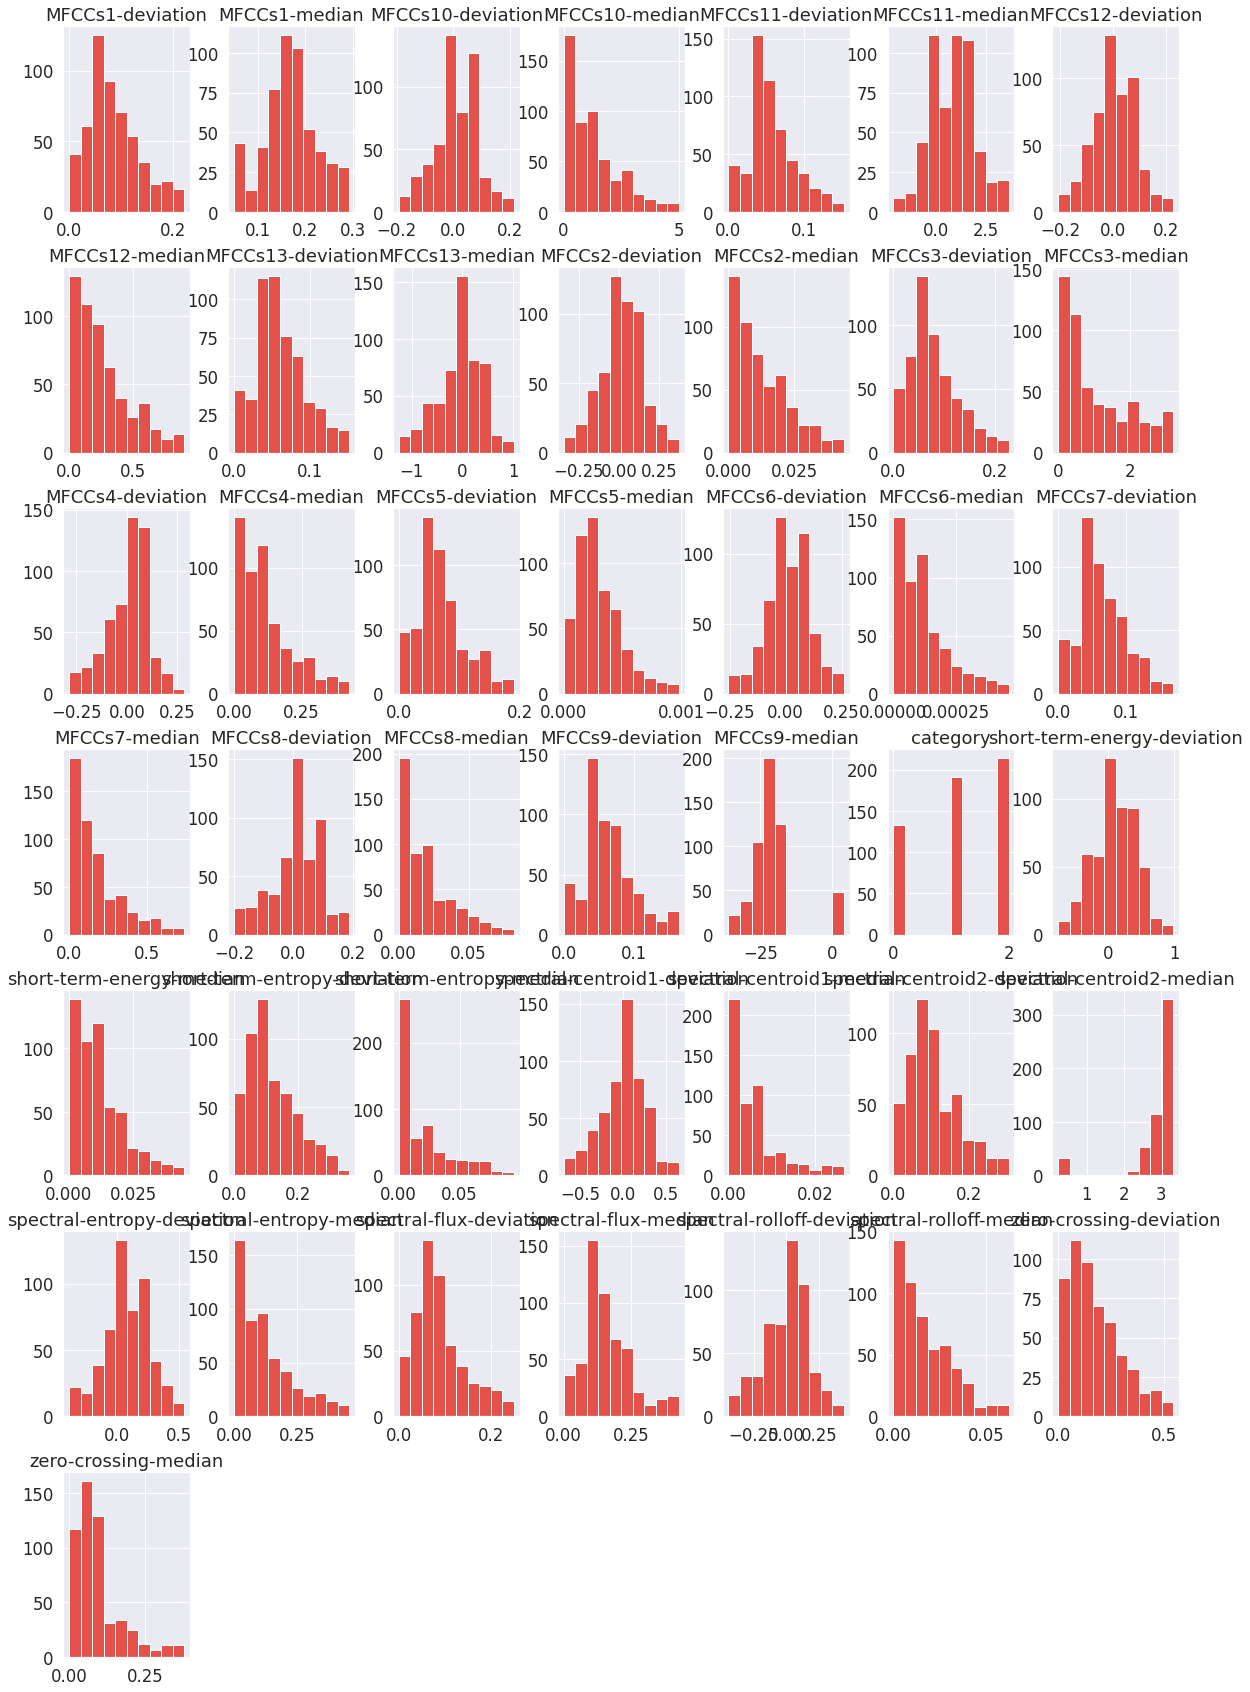

In [ ]:
#histogrm of the feature 
soundFeature.hist(figsize=(20,30));

In [ ]:
#missing value 

info_df = pd.DataFrame(soundFeature.dtypes)

# identifying the missing values from the dataset.
info_df['missing_val'] = soundFeature.isnull().sum()

info_df['missing_val_ratio'] = (info_df['missing_val'] / soundFeature.shape[0] * 100).round().astype(int)


# renaming the first column using rename()
info_df = info_df.rename(columns = {0:'data_type'})
info_df

,data_type,missing_val,missing_val_ratio
MFCCs1-deviation,float64,0,0
MFCCs1-median,float64,0,0
MFCCs10-deviation,float64,0,0
MFCCs10-median,float64,0,0
MFCCs11-deviation,float64,0,0
MFCCs11-median,float64,0,0
MFCCs12-deviation,float64,0,0
MFCCs12-median,float64,0,0
MFCCs13-deviation,float64,0,0
MFCCs13-median,float64,0,0


In [ ]:
numeric = ['short-term-energy-deviation', 
           'short-term-energy-median', 
           'short-term-entropy-deviation', 
           'short-term-entropy-median',
           'spectral-centroid1-deviation',
           'spectral-centroid1-median',
           'spectral-centroid2-deviation',
           'spectral-centroid2-median',
           'spectral-entropy-deviation',
           'spectral-entropy-median',
           'spectral-flux-deviation',
           'spectral-flux-median',
           'spectral-rolloff-deviation',
           'spectral-rolloff-median',
           'zero-crossing-deviation',
           'zero-crossing-median',
           'MFCCs1-deviation',
           'MFCCs1-median',
           'MFCCs2-deviation',
           'MFCCs2-median',
           'MFCCs3-deviation',
           'MFCCs3-median',
           'MFCCs4-deviation',
           'MFCCs4-median',
           'MFCCs5-deviation',
           'MFCCs5-median',
           'MFCCs6-deviation',
           'MFCCs6-median',
           'MFCCs7-deviation',
           'MFCCs7-median',
           'MFCCs8-deviation',
           'MFCCs8-median',
           'MFCCs9-deviation',
           'MFCCs9-median',
           'MFCCs10-deviation',
           'MFCCs10-median',
           'MFCCs11-deviation',
           'MFCCs11-median',
           'MFCCs12-deviation',
           'MFCCs12-median',
           'MFCCs13-median',
           'MFCCs13-deviation']

In [ ]:
categorical =['category']

In [ ]:
layout_options = {
    'paper_bgcolor':"#383838",
    'plot_bgcolor':'#383838',
    'title_font': dict(color='white'),
    'legend_font': dict(color='white'),
    'yaxis':dict(color="white"),
    'xaxis':dict(color="white")
    }

In [ ]:
fig = px.box(soundFeature, y='short-term-entropy-deviation', x='category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
#median
fig = px.box(soundFeature, y='short-term-entropy-median', x='category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = px.box(soundFeature, y='short-term-energy-deviation', x='category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = px.box(soundFeature, y='short-term-energy-median', x='category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = px.box(soundFeature, y='spectral-centroid1-deviation', x='category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = px.box(soundFeature, y='spectral-centroid1-median', x='category', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
soundFeature[numeric].corr()

,short-term-energy-deviation,short-term-energy-median,short-term-entropy-deviation,short-term-entropy-median,spectral-centroid1-deviation,spectral-centroid1-median,spectral-centroid2-deviation,spectral-centroid2-median,spectral-entropy-deviation,spectral-entropy-median,...,MFCCs9-deviation,MFCCs9-median,MFCCs10-deviation,MFCCs10-median,MFCCs11-deviation,MFCCs11-median,MFCCs12-deviation,MFCCs12-median,MFCCs13-median,MFCCs13-deviation
short-term-energy-deviation,1.000000,0.023177,0.086292,-0.087506,0.335272,0.032386,0.108982,0.056271,0.347878,0.045969,...,0.114804,-0.134401,0.199072,0.186823,0.088622,0.330533,0.190072,0.117507,0.268346,0.062880
short-term-energy-median,0.023177,1.000000,0.379281,-0.127025,0.071833,0.062732,0.284639,-0.069154,0.080103,0.312667,...,0.262433,-0.339241,0.052810,0.445771,0.318299,-0.224885,-0.040164,0.388411,0.090558,0.354776
short-term-entropy-deviation,0.086292,0.379281,1.000000,-0.248364,0.159454,-0.022055,0.540007,-0.253842,0.094089,0.448364,...,0.429131,-0.475603,0.111766,0.394328,0.430409,0.004114,0.078943,0.549186,0.052906,0.472837
short-term-entropy-median,-0.087506,-0.127025,-0.248364,1.000000,-0.186377,0.458071,-0.193740,0.161004,-0.008998,-0.284002,...,-0.051623,0.035097,-0.043676,-0.362350,-0.091347,0.047482,-0.054775,-0.308083,-0.083411,-0.184583
spectral-centroid1-deviation,0.335272,0.071833,0.159454,-0.186377,1.000000,0.067025,0.161320,-0.072462,0.290433,0.076372,...,0.158412,-0.097388,0.200365,0.085702,0.076877,0.109279,0.174161,0.112968,0.316210,0.087830
spectral-centroid1-median,0.032386,0.062732,-0.022055,0.458071,0.067025,1.000000,0.013174,0.116661,0.129703,-0.084576,...,0.049568,-0.037328,0.059459,-0.049078,0.034855,0.062492,-0.002125,-0.091133,0.000083,0.004814
spectral-centroid2-deviation,0.108982,0.284639,0.540007,-0.193740,0.161320,0.013174,1.000000,-0.099988,0.161468,0.378366,...,0.493505,-0.438458,0.024171,0.338091,0.420810,0.041158,0.069296,0.485360,0.052274,0.472986
spectral-centroid2-median,0.056271,-0.069154,-0.253842,0.161004,-0.072462,0.116661,-0.099988,1.000000,0.070329,-0.418124,...,-0.068503,0.174203,-0.074720,-0.126720,-0.110415,0.024362,-0.058692,-0.139578,0.074715,-0.282095
spectral-entropy-deviation,0.347878,0.080103,0.094089,-0.008998,0.290433,0.129703,0.161468,0.070329,1.000000,0.048302,...,0.186045,-0.133159,0.180655,0.099934,0.197457,0.200858,0.176326,0.138771,0.072929,0.133972
spectral-entropy-median,0.045969,0.312667,0.448364,-0.284002,0.076372,-0.084576,0.378366,-0.418124,0.048302,1.000000,...,0.293987,-0.411807,0.007230,0.471937,0.345183,-0.013872,-0.013344,0.411661,-0.001152,0.462439


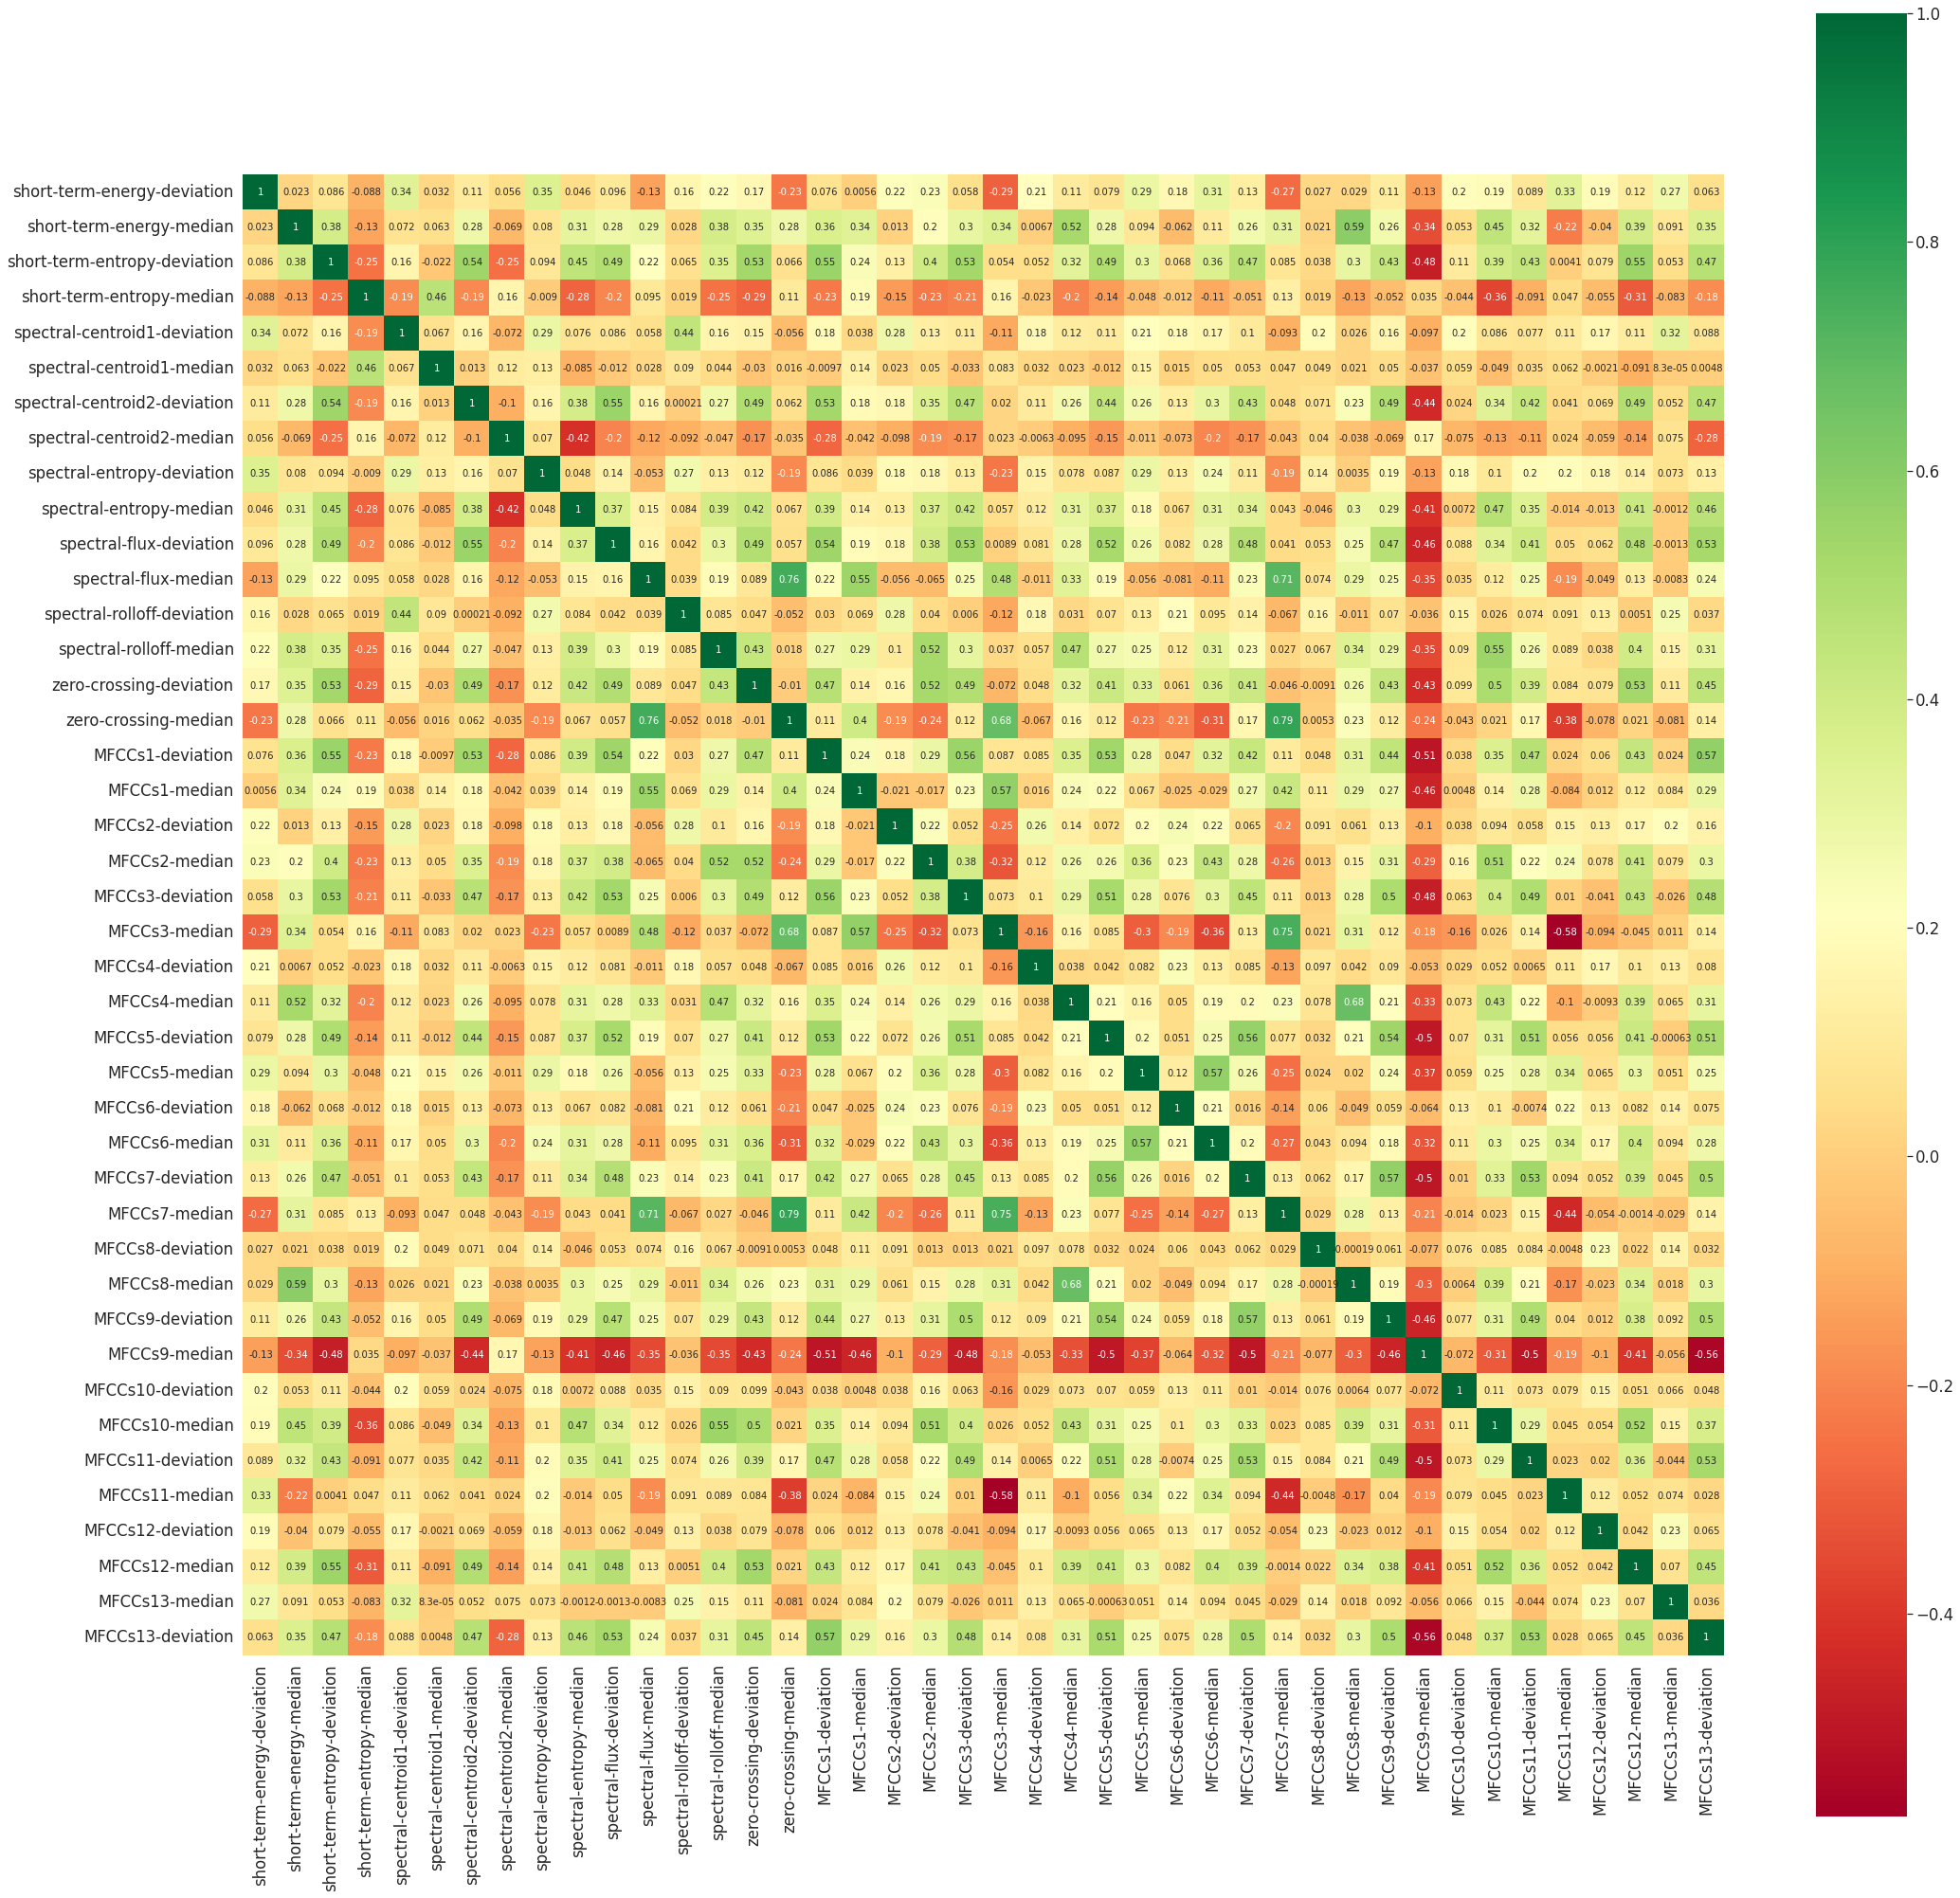

In [ ]:
plt.figure(figsize=(35,35))  # on this line I just set the size of figure to 30 by 30.
p=sns.heatmap(soundFeature[numeric].corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [ ]:
soundFeature[categorical].describe()

,category
count,538.000000
mean,1.150558
std,0.789603
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
# Create and fit selector
selector = SelectKBest(f_regression, k=10) # f_classif, chi2, f_regression, mutual_info_classif, mutual_info_regression

# Create empty dataframe
df = pd.DataFrame()

kpredictors = []
    
# test for division by zero errors due to insufficient data:
for p in numeric:
       
    kpredictors.append(p)
    
selector.fit(X_train, y_train)

# Get idxs of columns to keep
mask = selector.get_support(indices=True)

soundFeature = X_train[numeric].columns
df["bestFeature"] = soundFeature
df

,bestFeature
0,short-term-energy-deviation
1,short-term-energy-median
2,short-term-entropy-deviation
3,short-term-entropy-median
4,spectral-centroid1-deviation
5,spectral-centroid1-median
6,spectral-centroid2-deviation
7,spectral-centroid2-median
8,spectral-entropy-deviation
9,spectral-entropy-median


# models using  Machine Learning


##Random Forest Classifier model

In [ ]:
Standardscaler = StandardScaler()
# transform data
X_train_scaled = Standardscaler.fit_transform(X_train)

In [ ]:
scaler = MinMaxScaler()
# transform data
X_train_scaled_min = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled_min = scaler.fit_transform(X_test)

In [ ]:
X_test_scaled = Standardscaler.fit_transform(X_test)

In [ ]:
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_text_l1 = select.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (324, 42)
X_train_l1.shape: (324, 21)


([], <a list of 0 Text major ticklabel objects>)

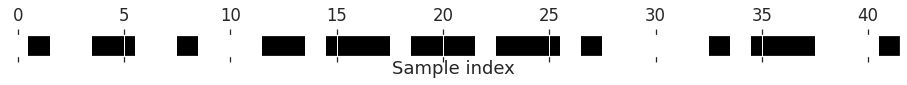

In [ ]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train_l1, y_train)

y_pred_rf = rnd_clf.predict(X_text_l1)
print(rnd_clf.score(X_train_l1, y_train))

0.9567901234567902


In [ ]:
rnd_clf1 = RandomForestClassifier(n_estimators=400, max_leaf_nodes=8, n_jobs=-1, random_state=42)
rnd_clf1.fit(X_train, y_train)

y_pred_rf = rnd_clf1.predict(X_test)
print(rnd_clf1.score(X_train, y_train))

0.9074074074074074


In [ ]:
y_pred_forest = cross_val_predict(rnd_clf,X_train, y_train,cv=3,method="predict_proba")

In [ ]:
print(rnd_clf1.score(X_test, y_test))

0.8518518518518519


In [ ]:
print(rnd_clf.score(X_text_l1, y_test))

0.8611111111111112


In [ ]:
param_grid1 = {'n_estimators': [100,200],
              'oob_score': [False,True],
               'max_leaf_nodes': [20,30,40,50],
               'min_samples_split': [8, 10, 12]
               }
grid1 = GridSearchCV(rnd_clf, param_grid1, cv=7)

In [ ]:
grid1.fit(x, y)
print('Grid best parameter (max. accuracy): ', grid1.best_params_)
print('Grid best score (accuracy): ', grid1.best_score_)

Grid best parameter (max. accuracy):  {'max_leaf_nodes': 30, 'min_samples_split': 8, 'n_estimators': 100, 'oob_score': False}
Grid best score (accuracy):  0.8167308881594596


In [ ]:
finalRandom = grid1.best_estimator_

In [ ]:
y_pred_rf = finalRandom.predict(X_test)

In [ ]:
finalRandom.score(X_train,y_train)

0.9814814814814815

In [ ]:
finalRandom.score(X_test,y_test)

0.9768518518518519

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_rf,average='weighted')))

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98


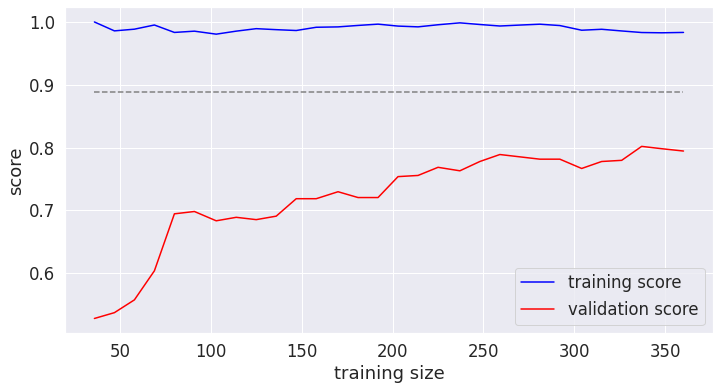

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

N, train_lc, val_lc = learning_curve(finalRandom,
                                     x, y, cv=3,
                                     train_sizes=np.linspace(0.1, 1, 30))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

##Logistic Regression model 

In [ ]:
select = SelectFromModel(
    LogisticRegression(solver='liblinear',max_iter= 1000),
    threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_text_l1 = select.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (324, 42)
X_train_l1.shape: (324, 21)


In [ ]:
model = make_pipeline(PolynomialFeatures(), LogisticRegression(solver='liblinear',max_iter= 1000))
y_pred = model.fit(X_train_l1, y_train).predict(X_text_l1)

In [ ]:
model.score(X_train_l1,y_train)

0.8703703703703703

In [ ]:
model.score(X_text_l1,y_test)

0.7962962962962963

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1: 0.80


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[44  4  7]
 [ 1 63 13]
 [ 7 12 65]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        55
           1       0.80      0.82      0.81        77
           2       0.76      0.77      0.77        84

    accuracy                           0.80       216
   macro avg       0.80      0.80      0.80       216
weighted avg       0.80      0.80      0.80       216



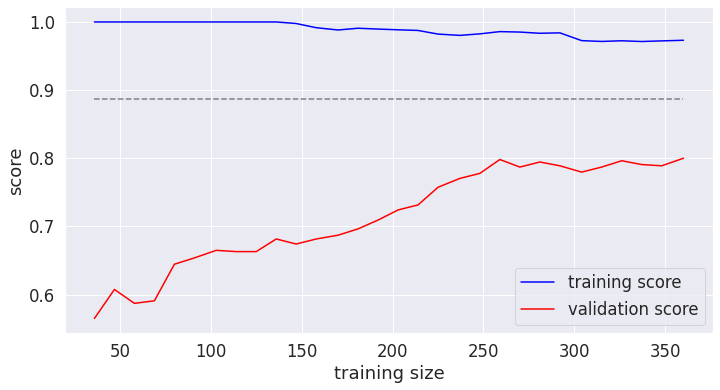

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

N, train_lc, val_lc = learning_curve(model,
                                     x, y, cv=3,
                                     train_sizes=np.linspace(0.1, 1, 30))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

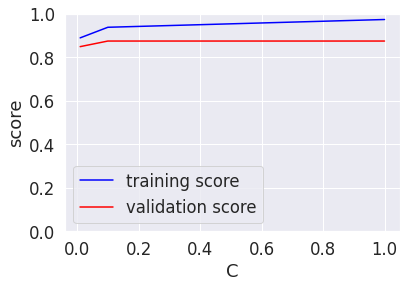

In [ ]:
#'logisticregression__penalty': ['l2'],
C = [0.01, 0.1, 1]

train_score, val_score = validation_curve(model, X_train, y_train,param_name= 'logisticregression__C',
                                          param_range = C ,cv=20)

plt.plot(C, np.median(train_score, 1), color='blue', label='training score')
plt.plot(C, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('C')
plt.ylabel('score');

## Ridge regression model

In [ ]:
select = SelectFromModel(
    Ridge(alpha=20.0),
    threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_text_l1 = select.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (324, 42)
X_train_l1.shape: (324, 21)


In [ ]:
model1 = make_pipeline(PolynomialFeatures(), Ridge(alpha=20.0))
y_predRidge = model1.fit(X_train_l1, y_train).predict(X_text_l1)

In [ ]:
model1.score(X_train_l1, y_train)

0.6504189306511223

In [ ]:
model1.score(X_text_l1, y_test)

0.560065654737256

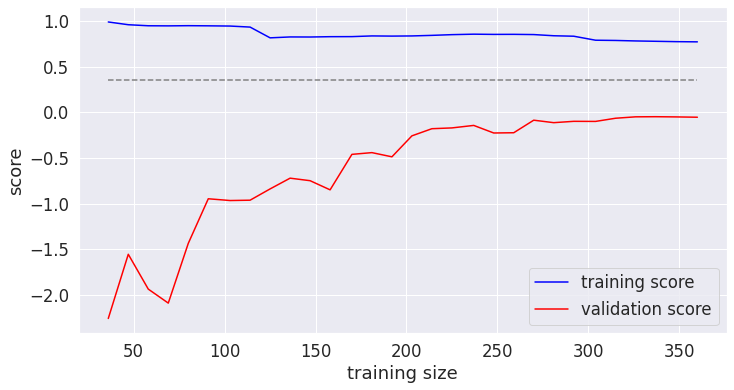

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

N, train_lc, val_lc = learning_curve(model1,
                                     x, y, cv=3,
                                     train_sizes=np.linspace(0.1, 1, 30))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

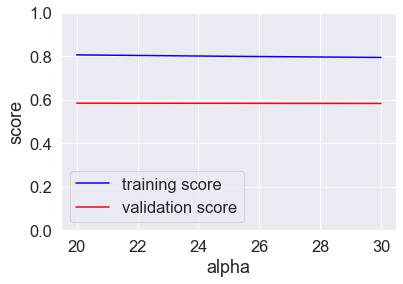

In [ ]:
alpha = [20.0, 25.0, 30.0]

train_score, val_score = validation_curve(model1, X_train, y_train,param_name= 'ridge__alpha',
                                          param_range = alpha ,cv=10)

plt.plot(alpha, np.median(train_score, 1), color='blue', label='training score')
plt.plot(alpha, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('score');

## Decision Tree Classifier model

In [ ]:
select = SelectFromModel(
    DecisionTreeClassifier(random_state=42),
    threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_text_l1 = select.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (324, 42)
X_train_l1.shape: (324, 21)


In [ ]:
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_train_l1,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(clf_all.feature_importances_)

[0.         0.101992   0.02760828 0.03111585 0.01839837 0.01299942
 0.0070763  0.01328044 0.05134246 0.01814435 0.01430984 0.09631986
 0.14547468 0.00732504 0.00163032 0.07695343 0.0070763  0.03311558
 0.00959231 0.01452834 0.31171683]


In [ ]:
n_features = soundFeature.shape[1]

#print(n_features)
#plt.barh(range(n_features), clf_all.feature_importances_, align='center')
#plt.yticks(np.arange(n_features), soundFeature.columns)
#plt.xlabel('Feature Importance')
#plt.ylabel('Feature')
#plt.show()

In [ ]:
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
y_predDeep_tree = deep_tree_clf2.fit(X_train_l1, y_train).predict(X_text_l1)

In [ ]:
deep_tree_clf2.fit(X_train_l1,y_train)
print("min_samples_leaf ={}, training score = {}".format(deep_tree_clf2.min_samples_leaf,deep_tree_clf2.score(X_train_l1,y_train)))

min_samples_leaf =5, training score = 0.904320987654321


In [ ]:
print("No restrictions test score = {}".format(deep_tree_clf2.score(X_text_l1,y_test)))

No restrictions test score = 0.75


In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predDeep_tree)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predDeep_tree,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predDeep_tree,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predDeep_tree,average='weighted')))

Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1: 0.75


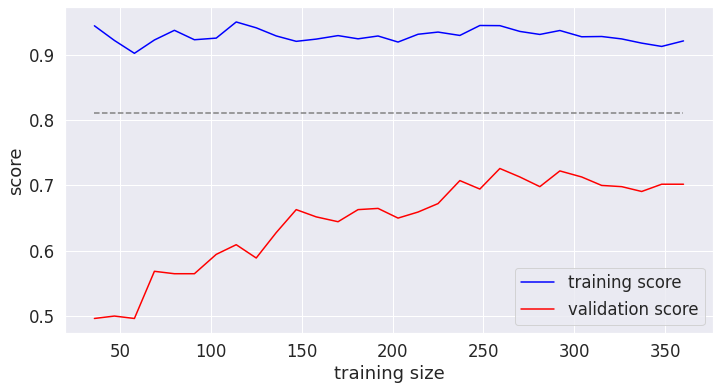

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

N, train_lc, val_lc = learning_curve(deep_tree_clf2,
                                     x, y, cv=3,
                                     train_sizes=np.linspace(0.1, 1, 30))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

In [ ]:
modelDecisionTree = make_pipeline(PolynomialFeatures(), DecisionTreeClassifier(min_samples_leaf=4, random_state=42))
y_predDecisionTree = modelDecisionTree.fit(X_train, y_train).predict(X_test)

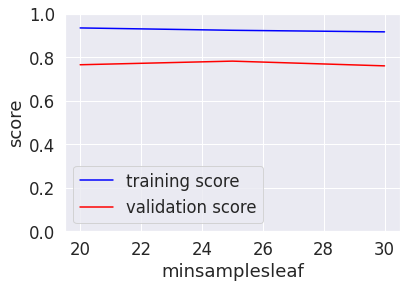

In [ ]:
minsamplesleaf = [4, 5, 6]

train_score, val_score = validation_curve(modelDecisionTree, X_train, y_train,param_name= 'decisiontreeclassifier__min_samples_leaf',
                                          param_range = minsamplesleaf ,cv=7)

plt.plot(alpha, np.median(train_score, 1), color='blue', label='training score')
plt.plot(alpha, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('minsamplesleaf')
plt.ylabel('score');

##Boosting Classifier

In [ ]:
select = SelectFromModel(
    GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0),
    threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_text_l1 = select.transform(X_test)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (324, 42)
X_train_l1.shape: (324, 21)


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train_l1, y_train)
predictions = gb_clf2.predict(X_text_l1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[46  1  8]
 [ 3 68  6]
 [ 4 13 67]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        55
           1       0.83      0.88      0.86        77
           2       0.83      0.80      0.81        84

    accuracy                           0.84       216
   macro avg       0.84      0.84      0.84       216
weighted avg       0.84      0.84      0.84       216



In [ ]:
param_grid2 = {'n_estimators': [100,200],
              'learning_rate': [0.05, 0.075, 0.1],
               'max_features': [2,3,4],
               'max_depth': [2, 3, 4]
               }
grid2 = GridSearchCV(gb_clf2, param_grid2, cv=7)

In [ ]:
grid2.fit(X_train_l1, y_train)
print('Grid best parameter (max. accuracy): ', grid2.best_params_)
print('Grid best score (accuracy): ', grid2.best_score_)

Grid best parameter (max. accuracy):  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 2, 'n_estimators': 200}
Grid best score (accuracy):  0.8828465706356549


In [ ]:
finalBoosting = grid2.best_estimator_

In [ ]:
filename = 'finalBoosting_model.sav'
pickle.dump(finalBoosting, open(filename, 'wb'))

In [ ]:
finalBoosting.score(X_train_l1,y_train)

1.0

In [ ]:
finalBoosting.score(X_text_l1,y_test)

0.8657407407407407

In [ ]:
y_predBoosting = finalBoosting.predict(X_text_l1)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predBoosting)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predBoosting,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predBoosting,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predBoosting,average='weighted')))

Accuracy: 0.87
Precision: 0.86
Recall: 0.87
F1: 0.86


In [ ]:
cmBoosting = confusion_matrix(y_test, y_predBoosting)

In [ ]:
cmBoosting

array([[47,  0,  8],
       [ 0, 74,  3],
       [ 8, 10, 66]])

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_predBoosting))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.88      0.96      0.92        77
           2       0.86      0.79      0.82        84

    accuracy                           0.87       216
   macro avg       0.86      0.87      0.86       216
weighted avg       0.86      0.87      0.86       216



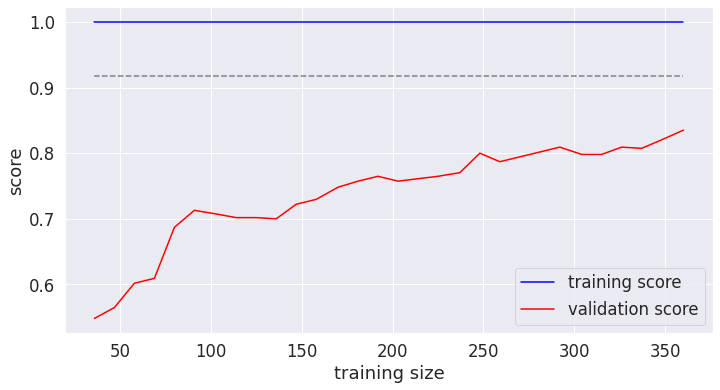

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

N, train_lc, val_lc = learning_curve(finalBoosting,
                                     x, y, cv=3,
                                     train_sizes=np.linspace(0.1, 1, 30))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.legend(loc='best')

In [ ]:
param_range = [5,10,20]

train_score, val_score = validation_curve(finalBoosting,
                                  X_train, y_train, param_name="n_estimators", param_range=param_range,
                                  cv=7, scoring="accuracy")

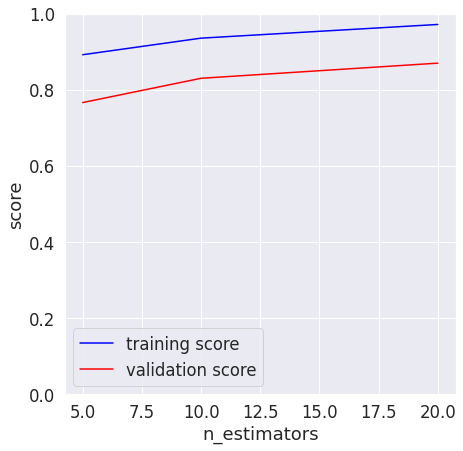

In [ ]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score');